# Análise exploratória de dados

In [1]:
# Importando bibliotecas.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Descrição dos dados

In [2]:
# ler excel do repositório remoto.
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/diamonds.csv")

# Exibir as primeiras linhas do DataFrame
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [3]:
# Mudando nome de colunas.
df.rename(columns = {"cut":"corte", "color":"cor", "clarity":"claridade", "depth": "profundidade", "table":"mesa", "price":"preço", "x":"comprimento", "y":"largura", "z":"altura"}, inplace = True)

# Visualização dos primeiros registros.
df.head()

,carat,corte,cor,claridade,profundidade,mesa,preço,comprimento,largura,altura
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Resumo estatístico de colunas numéricas.
df.describe()

,carat,profundidade,mesa,preço,comprimento,largura,altura
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 2. Perguntas de partida e hipóteses

## Primeiros passos do teste de hipótese
- Corte x Preço
- Cor x Preço
- Claridade x Preço

Durante a análise de diamantes, foi identificada um correlação positiva entre a qualidade do corte e o preço das pedras. Isso indica que, à medida que a qualidade do corte aumenta, o preço tende a aumentar. No entanto, ao examinar a cor e a claridade dos diamantes, essa correlação não foi observada. Não apresentando padrões claros e indo contra a classificação dos valores de acordo com as cores e as claridade apresentadas, levantando a hipótese de que outros fatores podem influenciar o preço de forma mais complexa. No momento, ainda não se pode inferir essa idéia, e será necessário uma maior análise para provar que existe alguma variável de interferência presente.

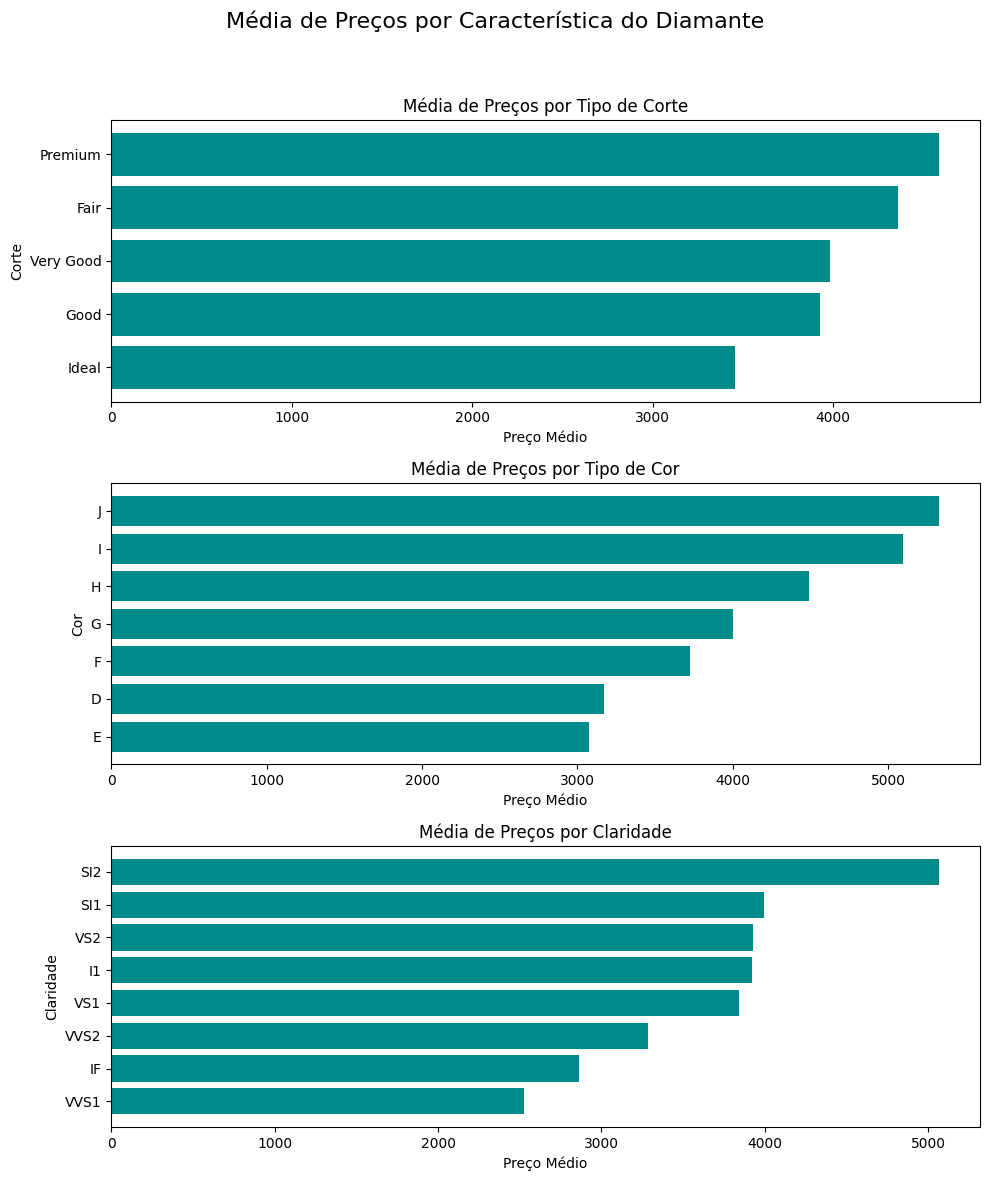

In [5]:
plt.figure(figsize=(10, 12))
plt.suptitle("Média de Preços por Característica do Diamante", fontsize=16)

# 1. Gráfico: Média de Preços por Tipo de Corte
plt.subplot(3, 1, 1)
df_avg = df.groupby('corte')['preço'].mean().reset_index()
df_avg = df_avg.sort_values(by='preço', ascending=True)
plt.barh(df_avg['corte'], df_avg['preço'], color='darkcyan')
plt.title('Média de Preços por Tipo de Corte', fontsize=12)
plt.xlabel('Preço Médio')
plt.ylabel('Corte')

# 2. Gráfico: Média de Preços por Tipo de Cor
plt.subplot(3, 1, 2)
df_avg = df.groupby('cor')['preço'].mean().reset_index()
df_avg = df_avg.sort_values(by='preço', ascending=True)
plt.barh(df_avg['cor'], df_avg['preço'], color='darkcyan')
plt.title('Média de Preços por Tipo de Cor', fontsize=12)
plt.xlabel('Preço Médio')
plt.ylabel('Cor')

# 3. Gráfico: Média de Preços por Claridade
plt.subplot(3, 1, 3)
df_avg = df.groupby('claridade')['preço'].mean().reset_index()
df_avg = df_avg.sort_values(by='preço', ascending=True)
plt.barh(df_avg['claridade'], df_avg['preço'], color='darkcyan')
plt.title('Média de Preços por Claridade', fontsize=12)
plt.xlabel('Preço Médio')
plt.ylabel('Claridade')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para evitar sobreposição e espaço para o título principal
plt.show()

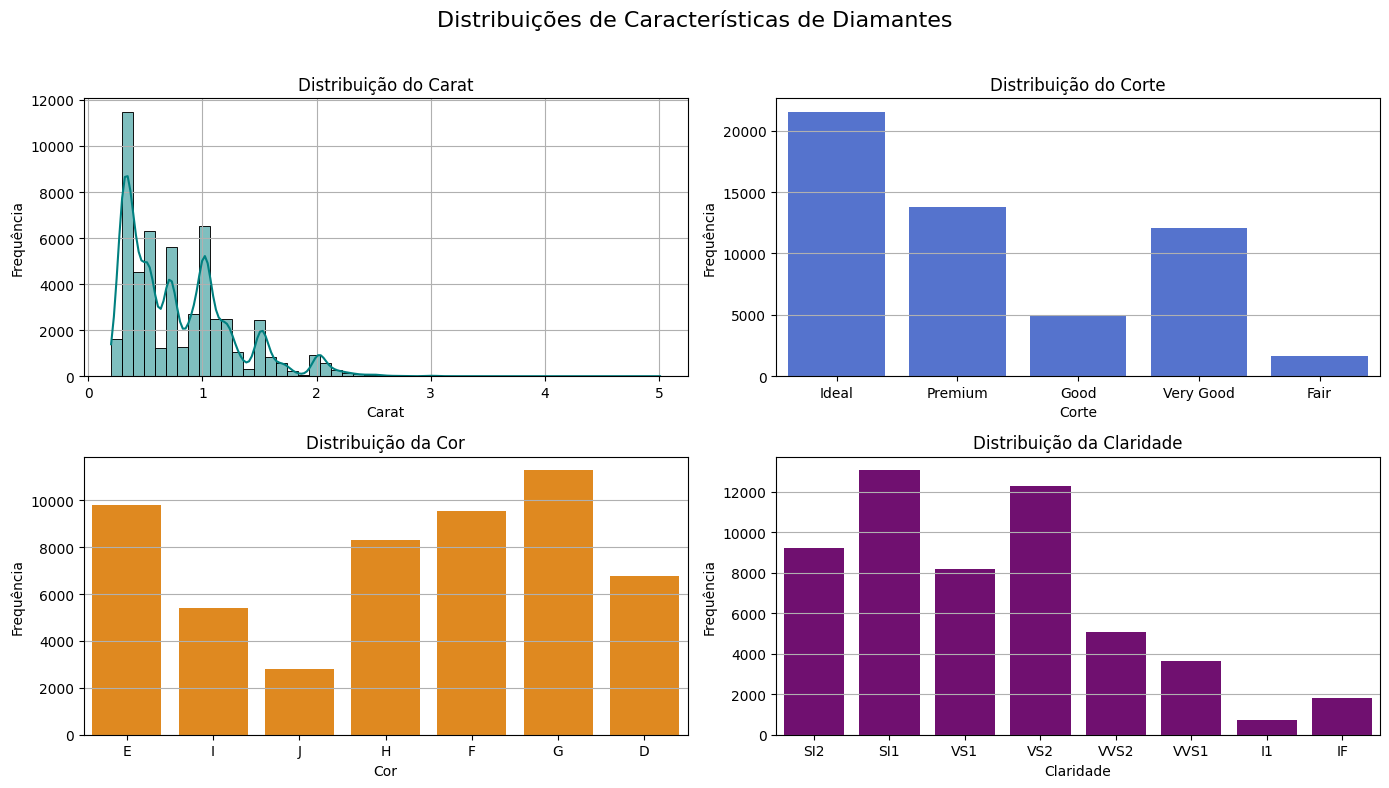

In [6]:
# SubPlots dentro de uma figura.
plt.figure(figsize=(14, 8))
plt.suptitle("Distribuições de Características de Diamantes", fontsize=16)

# Distribuição de Carat.
plt.subplot(2, 2, 1)
sns.histplot(df['carat'], bins=50, kde=True, color='teal')
plt.title('Distribuição do Carat', fontsize=12)
plt.xlabel("Carat")
plt.ylabel("Frequência")
plt.grid(True)

# Distribuição de Corte.
plt.subplot(2, 2, 2)
sns.countplot(x='corte', data=df, color='royalblue')
plt.title('Distribuição do Corte', fontsize=12)
plt.xlabel("Corte")
plt.ylabel("Frequência")
plt.grid(axis='y')

# Distribuição de Cor.
plt.subplot(2, 2, 3)
sns.countplot(x='cor', data=df, color='darkorange')
plt.title('Distribuição da Cor', fontsize=12)
plt.xlabel("Cor")
plt.ylabel("Frequência")
plt.grid(axis='y')

# Distribuição de Claridade.
plt.subplot(2, 2, 4)
sns.countplot(x='claridade', data=df, color='purple')
plt.title('Distribuição da Claridade', fontsize=12)
plt.xlabel("Claridade")
plt.ylabel("Frequência")
plt.grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Teste de hipótese

Será criada uma nova coluna no Data Frame, levando em conta as dimensões de comprimento, largura e altura dos diamantes. Além disso, levamos em conta à mesa superior e a profundidade do diamante, esses paramêtros serão usados para o cálculo do volume das gemas, permitindo uma análise mais detalhada e precisa do correlação do tamanho dos diamante com as variáveis de cor e claridade, e utilizando essas correlações para observar uma possível interferência no preço, levantado posteriormente pela hipótese.

In [7]:
# Calcular o volume aproximado
df['volume'] = df['comprimento'] * df['largura'] * df['altura']

print(df)

       carat      corte cor claridade  profundidade  mesa  preço  comprimento  \
0       0.23      Ideal   E       SI2          61.5  55.0    326         3.95   
1       0.21    Premium   E       SI1          59.8  61.0    326         3.89   
2       0.23       Good   E       VS1          56.9  65.0    327         4.05   
3       0.29    Premium   I       VS2          62.4  58.0    334         4.20   
4       0.31       Good   J       SI2          63.3  58.0    335         4.34   
...      ...        ...  ..       ...           ...   ...    ...          ...   
53935   0.72      Ideal   D       SI1          60.8  57.0   2757         5.75   
53936   0.72       Good   D       SI1          63.1  55.0   2757         5.69   
53937   0.70  Very Good   D       SI1          62.8  60.0   2757         5.66   
53938   0.86    Premium   H       SI2          61.0  58.0   2757         6.15   
53939   0.75      Ideal   D       SI2          62.2  55.0   2757         5.83   

       largura  altura     

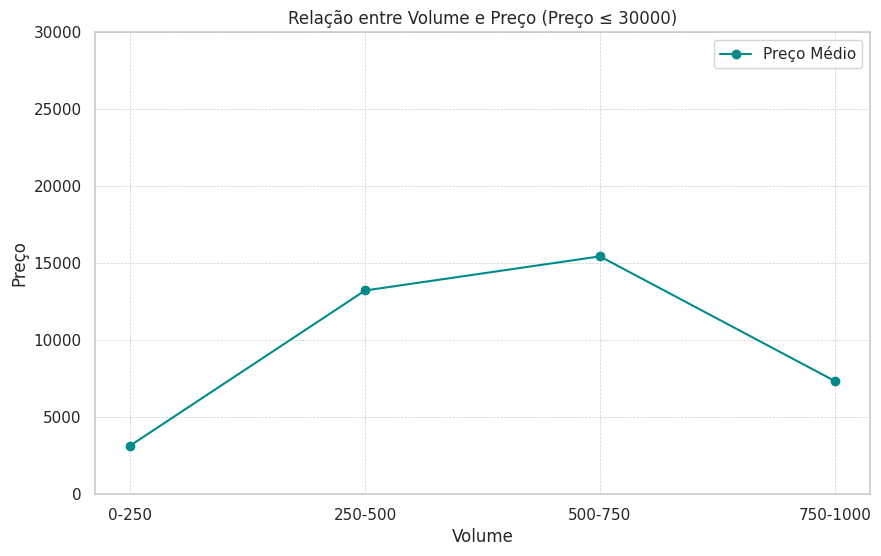

In [8]:
# Definindo os bins para o volume
bins = [0, 250, 500, 750, 1000, 2000]  
labels = ['0-250', '250-500', '500-750', '750-1000', '1000+']
df['volume_grupo'] = pd.cut(df['volume'], bins=bins, labels=labels, right=False)
df_grouped = df.groupby('volume_grupo', as_index=False).mean(numeric_only=True)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_grouped["volume_grupo"], df_grouped["preço"], marker="o", color="darkcyan", label="Preço Médio")

# Configurações dos eixos e do layout
plt.xlabel("Volume")
plt.ylabel("Preço")
plt.title("Relação entre Volume e Preço (Preço ≤ 30000)")
plt.ylim(0, 30000)  
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

# Exibir o gráfico
plt.show()

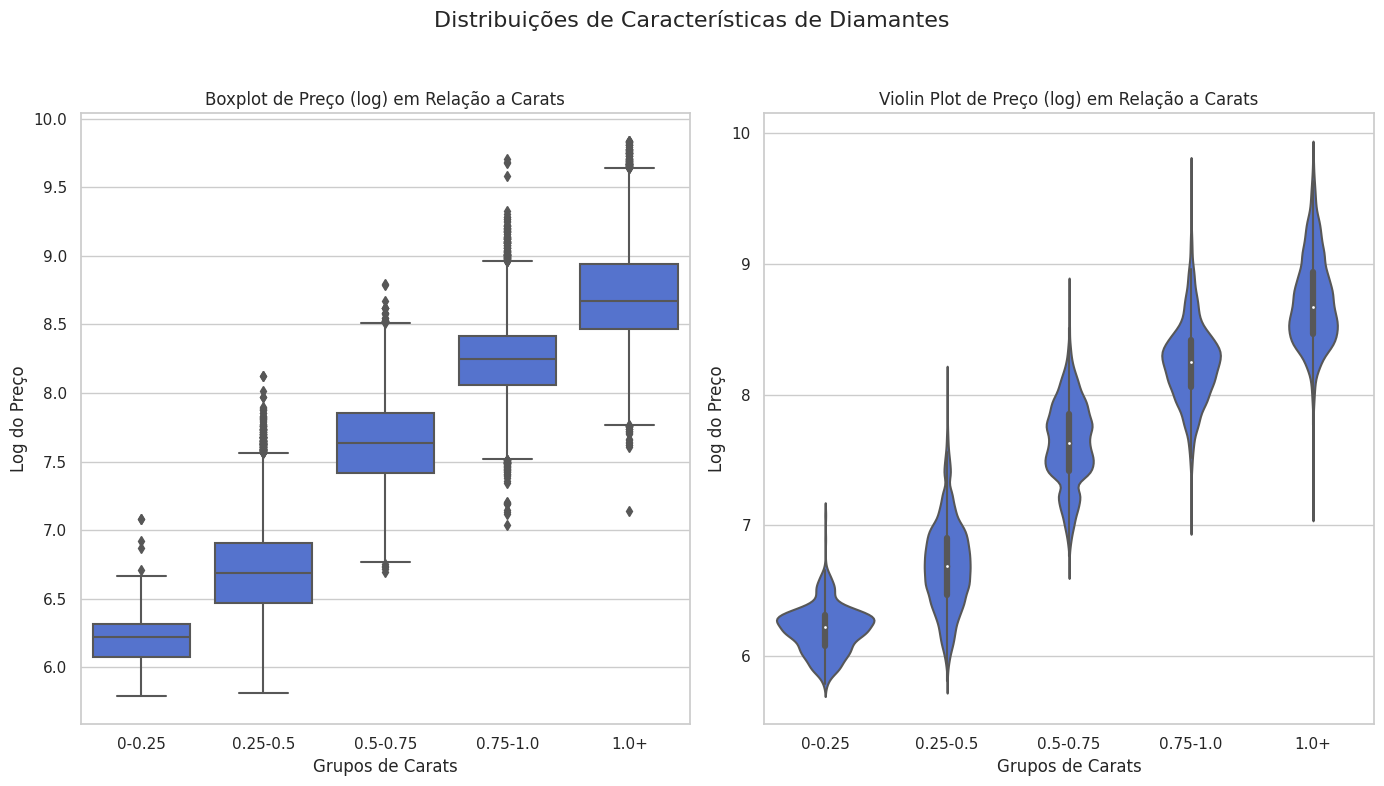

In [9]:
# Configurando o tamanho da figura e o título
plt.figure(figsize=(14, 8))
plt.suptitle("Distribuições de Características de Diamantes", fontsize=16)

# Agrupando carats em intervalos
bins = [0, 0.25, 0.5, 0.75, 1.0, 1.5]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0', '1.0+']
df['carat_group'] = pd.cut(df['carat'], bins=bins, labels=labels)

# Aplicando a transformação logarítmica ao preço
df['log_price'] = np.log(df['preço'])

# Gráfico 1: Boxplot de Preço (log) em relação a Carats
plt.subplot(1, 2, 1)
sns.boxplot(x='carat_group', y='log_price', data=df, color='royalblue')
plt.title('Boxplot de Preço (log) em Relação a Carats')
plt.xlabel('Grupos de Carats')
plt.ylabel('Log do Preço')

# Gráfico 2: Violin Plot de Preço (log) em relação a Carats
plt.subplot(1, 2, 2)
sns.violinplot(x='carat_group', y='log_price', data=df, color='royalblue')
plt.title('Violin Plot de Preço (log) em Relação a Carats')
plt.xlabel('Grupos de Carats')
plt.ylabel('Log do Preço')

# Ajusta o layout para que os gráficos não se sobreponham e fiquem com a mesma proporção
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste para o título
plt.show()

## 3. Insights